<a href="https://colab.research.google.com/github/Volks44/ML_Lab/blob/main/Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

Burgos Jose (BX7FN1)

## Problem 5
Solve the Min. cost Multicommodity Flow Problem with bifurcated flows using linear programming.
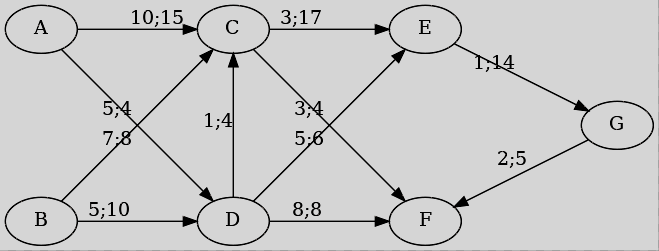

Commodity / Flow 1: from A to F, required capacity: 5

Commodity / Flow 2: from B to E, required capacity: 4

In [120]:
pip install pulp --q

In [121]:
from pulp import *
import networkx as nx
import matplotlib.pyplot as plt

In [122]:
#Iniciate the graph
G = nx.DiGraph()

G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G'])

pos={
    'A':(1,5),
    'B':(1,1),
    'C':(3,5),
    'D':(3,1),
    'E':(5,5),
    'F':(5,1),
    'G':(7,3)
}

In [123]:
# Define the graph structure with costs and capacities for each edge
edges = {
    ('A', 'C'): {'cost': 10, 'capacity': 15},
    ('A', 'D'): {'cost': 5, 'capacity': 4},
    ('B', 'C'): {'cost': 7, 'capacity': 8},
    ('B', 'D'): {'cost': 5, 'capacity': 10},
    ('C', 'E'): {'cost': 3, 'capacity': 17},
    ('C', 'F'): {'cost': 3, 'capacity': 4},
    ('D', 'C'): {'cost': 1, 'capacity': 4},
    ('D', 'E'): {'cost': 5, 'capacity': 6},
    ('D', 'F'): {'cost': 8, 'capacity': 8},
    ('E', 'G'): {'cost': 1, 'capacity': 14},
    ('F', 'G'): {'cost': 2, 'capacity': 5}
}

for (i, j), attr in edges.items():
    G.add_edge(i, j, capacity=attr['capacity'], cost=attr['cost'])

{('A', 'C'): Text(2.552834233269096, 5.0, '10'),
 ('A', 'D'): Text(2.5808551057241855, 1.8382897885516285, '5'),
 ('B', 'C'): Text(2.5808551057241855, 4.161710211448372, '7'),
 ('B', 'D'): Text(2.552834233269096, 1.0, '5'),
 ('C', 'E'): Text(4.552834233269095, 5.0, '3'),
 ('C', 'F'): Text(4.580855105724186, 1.8382897885516285, '3'),
 ('D', 'C'): Text(3.0000000000000004, 4.158103586919606, '1'),
 ('D', 'E'): Text(4.580855105724186, 4.161710211448372, '5'),
 ('D', 'F'): Text(4.552834233269095, 1.0, '8'),
 ('E', 'G'): Text(6.568664135225117, 3.431335864774883, '1'),
 ('F', 'G'): Text(6.568664135225117, 2.5686641352251174, '2')}

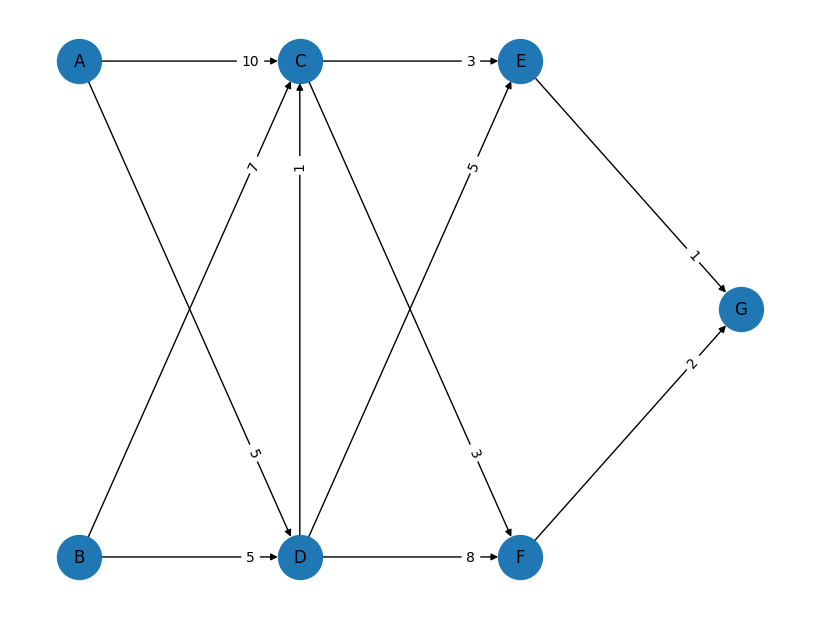

In [124]:
# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=1000)
edge_labels = nx.get_edge_attributes(G, 'cost')
nx.draw_networkx_edge_labels(G,pos,edge_labels,label_pos=0.8)

In [125]:
# Define commodities with source, sink, and required flow
commodities = {
    1: {'source': 'A', 'sink': 'F', 'demand': 5},
    2: {'source': 'B', 'sink': 'E', 'demand': 4}
}

In [126]:
# Initialize the LP problem
prob = LpProblem("MinCostMulticommodityFlow", LpMinimize)

In [127]:
# Create flow variables for each commodity on each edge
flow = {(k, i, j): LpVariable(f"flow_{k}_{i}_{j}", 0, None)
        for k in commodities for (i, j) in edges}

In [128]:
# Objective function: Minimize the total cost of flows
prob += lpSum(flow[k, i, j] * edges[i, j]['cost'] for k in commodities for (i, j) in edges)

In [129]:
# Capacity constraints: Total flow on each edge <= edge capacity
for (i, j) in edges:
    prob += lpSum(flow[k, i, j] for k in commodities) <= edges[i, j]['capacity'], f"Capacity_{i}_{j}"

In [130]:
# Flow conservation constraints for each commodity
for k, commodity in commodities.items():
    source = commodity['source']
    sink = commodity['sink']
    demand = commodity['demand']
    # Conservation of flow for each node except the source and sink
    for node in set([n for edge in edges for n in edge]):  # All unique nodes in the graph
        if node == source:
            prob += lpSum(flow[k, node, j] for (node_, j) in edges if node_ == node) - \
                    lpSum(flow[k, i, node] for (i, node_) in edges if node_ == node) == demand, f"FlowConservation_{k}_{node}"
        elif node == sink:
            prob += lpSum(flow[k, node, j] for (node_, j) in edges if node_ == node) - \
                    lpSum(flow[k, i, node] for (i, node_) in edges if node_ == node) == -demand, f"FlowConservation_{k}_{node}"
        else:
            prob += lpSum(flow[k, node, j] for (node_, j) in edges if node_ == node) - \
                    lpSum(flow[k, i, node] for (i, node_) in edges if node_ == node) == 0, f"FlowConservation_{k}_{node}"

In [131]:
print(prob)

MinCostMulticommodityFlow:
MINIMIZE
10*flow_1_A_C + 5*flow_1_A_D + 7*flow_1_B_C + 5*flow_1_B_D + 3*flow_1_C_E + 3*flow_1_C_F + 1*flow_1_D_C + 5*flow_1_D_E + 8*flow_1_D_F + 1*flow_1_E_G + 2*flow_1_F_G + 10*flow_2_A_C + 5*flow_2_A_D + 7*flow_2_B_C + 5*flow_2_B_D + 3*flow_2_C_E + 3*flow_2_C_F + 1*flow_2_D_C + 5*flow_2_D_E + 8*flow_2_D_F + 1*flow_2_E_G + 2*flow_2_F_G + 0
SUBJECT TO
Capacity_A_C: flow_1_A_C + flow_2_A_C <= 15

Capacity_A_D: flow_1_A_D + flow_2_A_D <= 4

Capacity_B_C: flow_1_B_C + flow_2_B_C <= 8

Capacity_B_D: flow_1_B_D + flow_2_B_D <= 10

Capacity_C_E: flow_1_C_E + flow_2_C_E <= 17

Capacity_C_F: flow_1_C_F + flow_2_C_F <= 4

Capacity_D_C: flow_1_D_C + flow_2_D_C <= 4

Capacity_D_E: flow_1_D_E + flow_2_D_E <= 6

Capacity_D_F: flow_1_D_F + flow_2_D_F <= 8

Capacity_E_G: flow_1_E_G + flow_2_E_G <= 14

Capacity_F_G: flow_1_F_G + flow_2_F_G <= 5

FlowConservation_1_F: - flow_1_C_F - flow_1_D_F + flow_1_F_G = -5

FlowConservation_1_G: - flow_1_E_G - flow_1_F_G = 0

FlowConserv

In [132]:
# Solve the problem
prob.solve()
print(LpStatus[prob.status])
print(value(prob.objective))

Optimal
92.0


In [133]:
# Extract the flow values and total cost
flow_values = {(k, i, j): flow[k, i, j].varValue for k in commodities for (i, j) in edges if flow[k, i, j].varValue > 0}

flow_values

{(1, 'A', 'C'): 1.0,
 (1, 'A', 'D'): 4.0,
 (1, 'C', 'F'): 4.0,
 (1, 'D', 'C'): 3.0,
 (1, 'D', 'F'): 1.0,
 (2, 'B', 'C'): 3.0,
 (2, 'B', 'D'): 1.0,
 (2, 'C', 'E'): 4.0,
 (2, 'D', 'C'): 1.0}

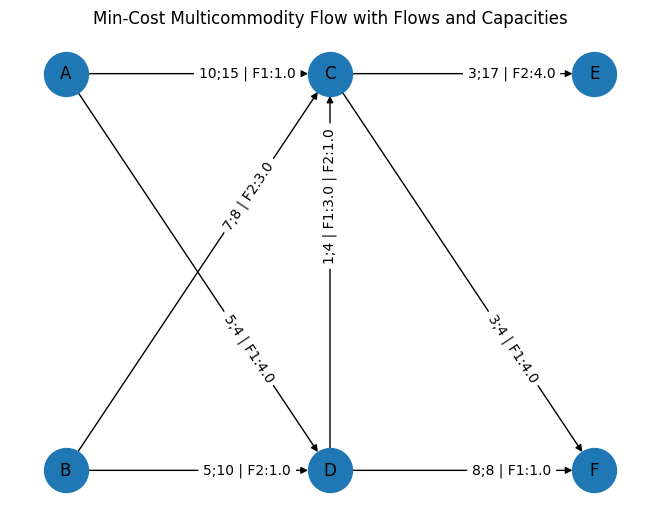

In [134]:
S=nx.DiGraph()
S_edge_labels={}

for i, j, data in G.edges(data=True):
    edge_has_positive_flow = False
    edge_label = f"{data['cost']};{data['capacity']}"  # Base label with cost and capacity

    # Check flow values for each commodity on this edge
    for k in commodities:
        flow_value = flow_values.get((k, i, j), 0)
        if flow_value > 0:
            edge_label += f" | F{k}:{flow_value}"
            edge_has_positive_flow = True

    # If the edge has a positive flow for any commodity, add it to S and store the label
    if edge_has_positive_flow:
        S.add_edge(i, j)
        S_edge_labels[(i, j)] = edge_label

nx.draw(S,pos,with_labels={node:node for node in G.nodes()}, node_size=1000)
nx.draw_networkx_edge_labels(S,pos,S_edge_labels,label_pos=0.7)
plt.title("Min-Cost Multicommodity Flow with Flows and Capacities")
plt.axis("off")
plt.show()